In [86]:
from scipy.optimize import brentq
from BNumMet.NonLinear import zBrentDekker
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn as sns

sns.set_theme(
    style="white",
)

# 0. Experiment Function
For the following examples, we will use the following function that outputs a plot comparing the number of iterations required to reach a certain accuracy for different methods.

In [87]:
getIterations = lambda x: x[
    1
]  # This returns the number of iterations the algorithm took
getIntervalWidth = lambda x: x[
    0
]  # This returns the interval width we have increased by
getValue = lambda x: x[2]  # This is the value of the function at the root (should be 0)


def experimentPlot(df, order, noMatlab=False, number=1):
    # Plot 3 graphs in one figure
    # 1. Number of iterations
    # 2. Difference between root and 0
    # 3. Difference between root and 0 as a bar chart
    # plt.style.use('seaborn-whitegrid')
    xAxis = list(
        map(getIntervalWidth, df["Scipy"][order])
    )  # This is the x axis for all the plots
    # Plot 1 - Number of iterations
    fig, axis = plt.subplots(2, 1, sharex=True, figsize=(25, 15))

    axis[0].plot(
        xAxis,
        list(map(getIterations, df["Scipy"][order])),
        "b-",
        label="Scipy",
    )
    axis[0].plot(
        xAxis,
        list(map(getIterations, df["BNM"][order])),
        "r-",
        label="BNM",
    )
    if not noMatlab:
        axis[0].plot(
            xAxis,
            list(map(getIterations, df["Matlab"][order])),
            "g--",
            label="Matlab",
        )

    axis[0].legend()
    axis[0].set_title(f"Number of iterations for {order}")

    # Plot 2 - Difference between root and 0
    valsScipy = list(map(getValue, df["Scipy"][order]))
    valsBNUM = list(map(getValue, df["BNM"][order]))
    valsMatlab = list(map(getValue, df["Matlab"][order]))
    if number == 1:
        calcNumb = 1
    else:
        calcNumb = 0.1

    # Subtract the number and divide by the number in absolute value
    valsScipy = [
        abs((valsScipy[i] - calcNumb) / calcNumb) for i in range(len(valsScipy))
    ]
    valsBNUM = [abs((valsBNUM[i] - calcNumb) / calcNumb) for i in range(len(valsBNUM))]
    valsMatlab = [
        abs((valsMatlab[i] - calcNumb) / calcNumb) for i in range(len(valsMatlab))
    ]

    axis[1].plot(xAxis, valsScipy, label="Scipy")
    axis[1].plot(xAxis, valsBNUM, label="BNM")
    if not noMatlab:
        axis[1].plot(xAxis, valsMatlab, label="Matlab")
    axis[1].legend()
    axis[1].set_title(f"Difference between root and 0 for {order}")
    axis[1].set_yscale("log")

    """
    # Plot 3 - Difference between root and 0 as a bar chart
    difference = [valsScipy[i] - valsBNUM[i] for i in range(len(valsScipy))]
    axis[2].bar(xAxis, difference, label="Scipy - BNM Bar Chart")
    axis[2].set_title(f"Difference between root and 0 for {order} as a bar chart")
    """

    fig.tight_layout()
    return fig

In [88]:
number = 2

# 1. (Equal) Comparison between Scipy, BNumMet Brent's method and Matlab's Brent's method
Firstly we compare the performance of the Brent's method implemented in Scipy and BNumMet using the same tolerance (1e-15) and maximum number of iterations (1000 - should be more than enough) as input parameters. 

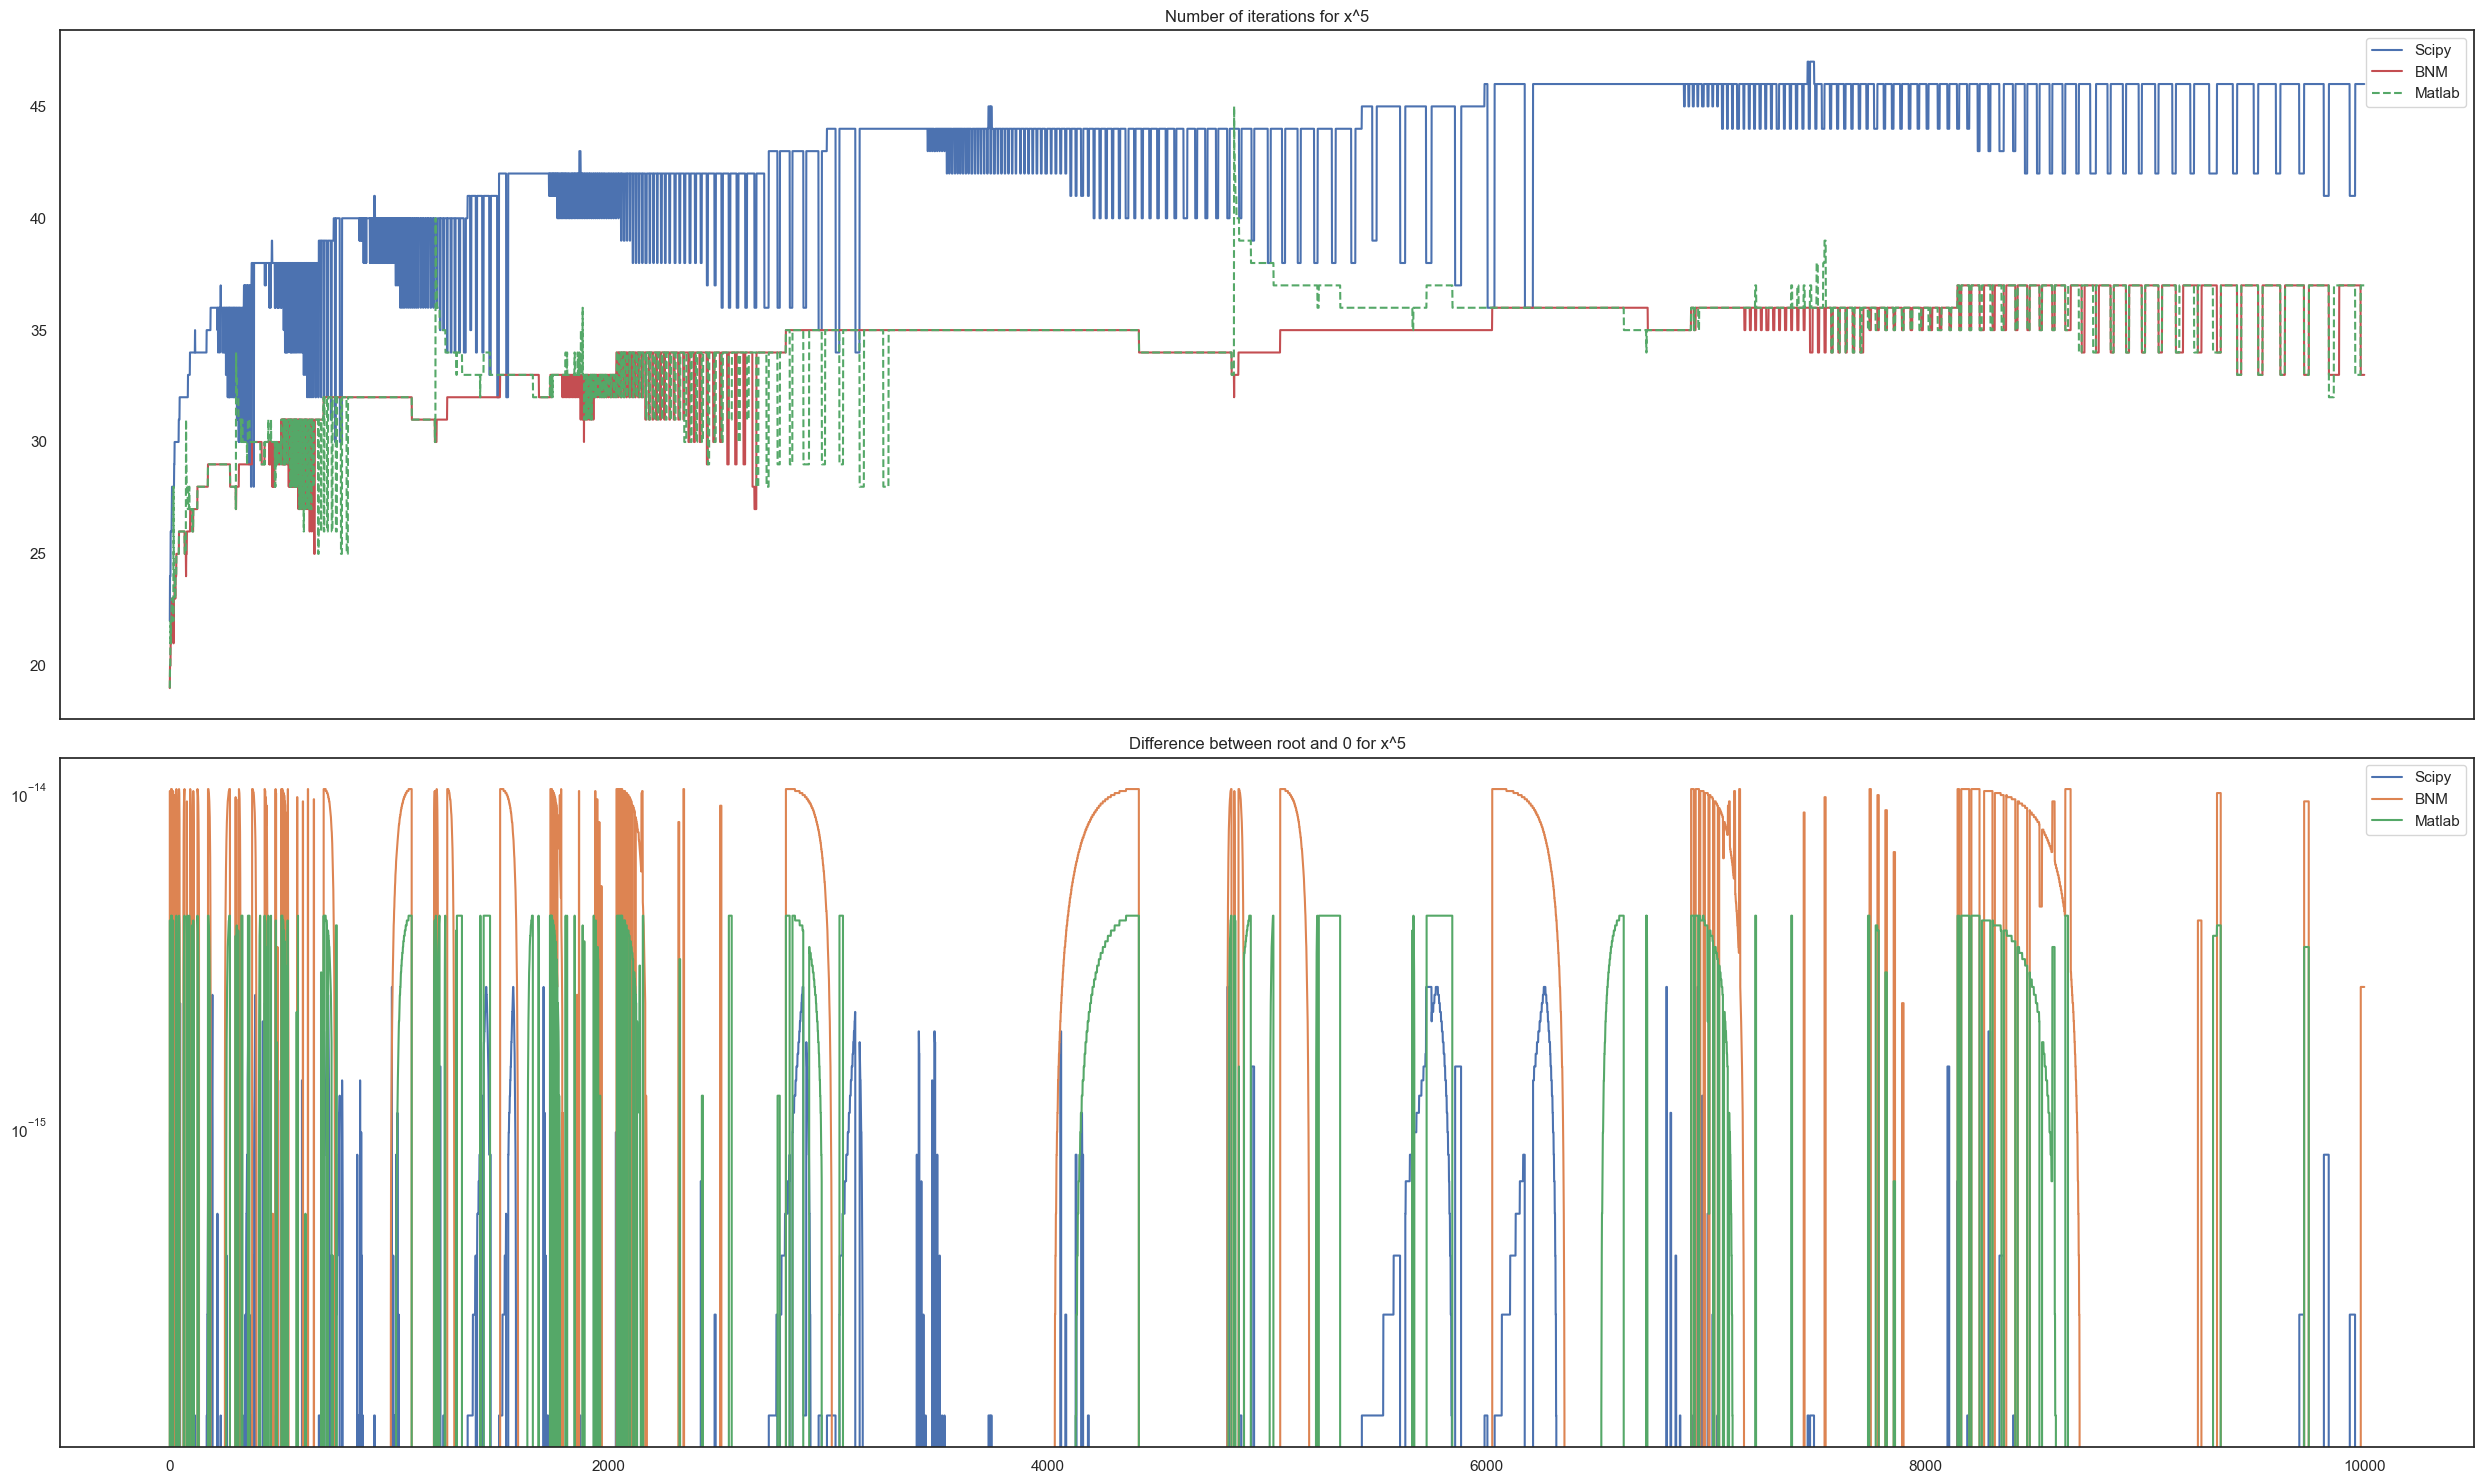

In [89]:
results = json.load(open(f"./Results/NonLinear/NonLinearTimings_{number}.json", "r"))
df = pd.DataFrame(results)
order = "x^5"
experimentPlot(df, order, number=number)
plt.show()

# 2. (Unequal) Comparison between Scipy and BNumMet Brent's method 
Now we compare the performance of the Brent's method implemented in Scipy and BNumMet using different tolerance because as we can see in the previous example, BNumMet's Brent's method is already very fast and accurate but not to the degree of Scipy's Brent's method (which is only by a small margin), therefore we will play incrementing the tolerances of BNumMet's Brent's method and Scipy's by a factor of 10^-1 and compare the results, independently. 

## 2.1 BNumMet Brent's method with tolerance 10^-17
Our expected result will be that we will achive better results with BNumMet's Brent's method because we will be able to reach the better accuracy while increasing the number of iterations, hopefully still being faster than Scipy's Brent's method. However, between Matlab's Brent's method and BNumMet's Brent's method, we expect to see BNumMet's Brent's method being more accurate than Matlab's Brent's method, however the number of iterations will be higher than Matlab's Brent's method - as we can see in the previous example.

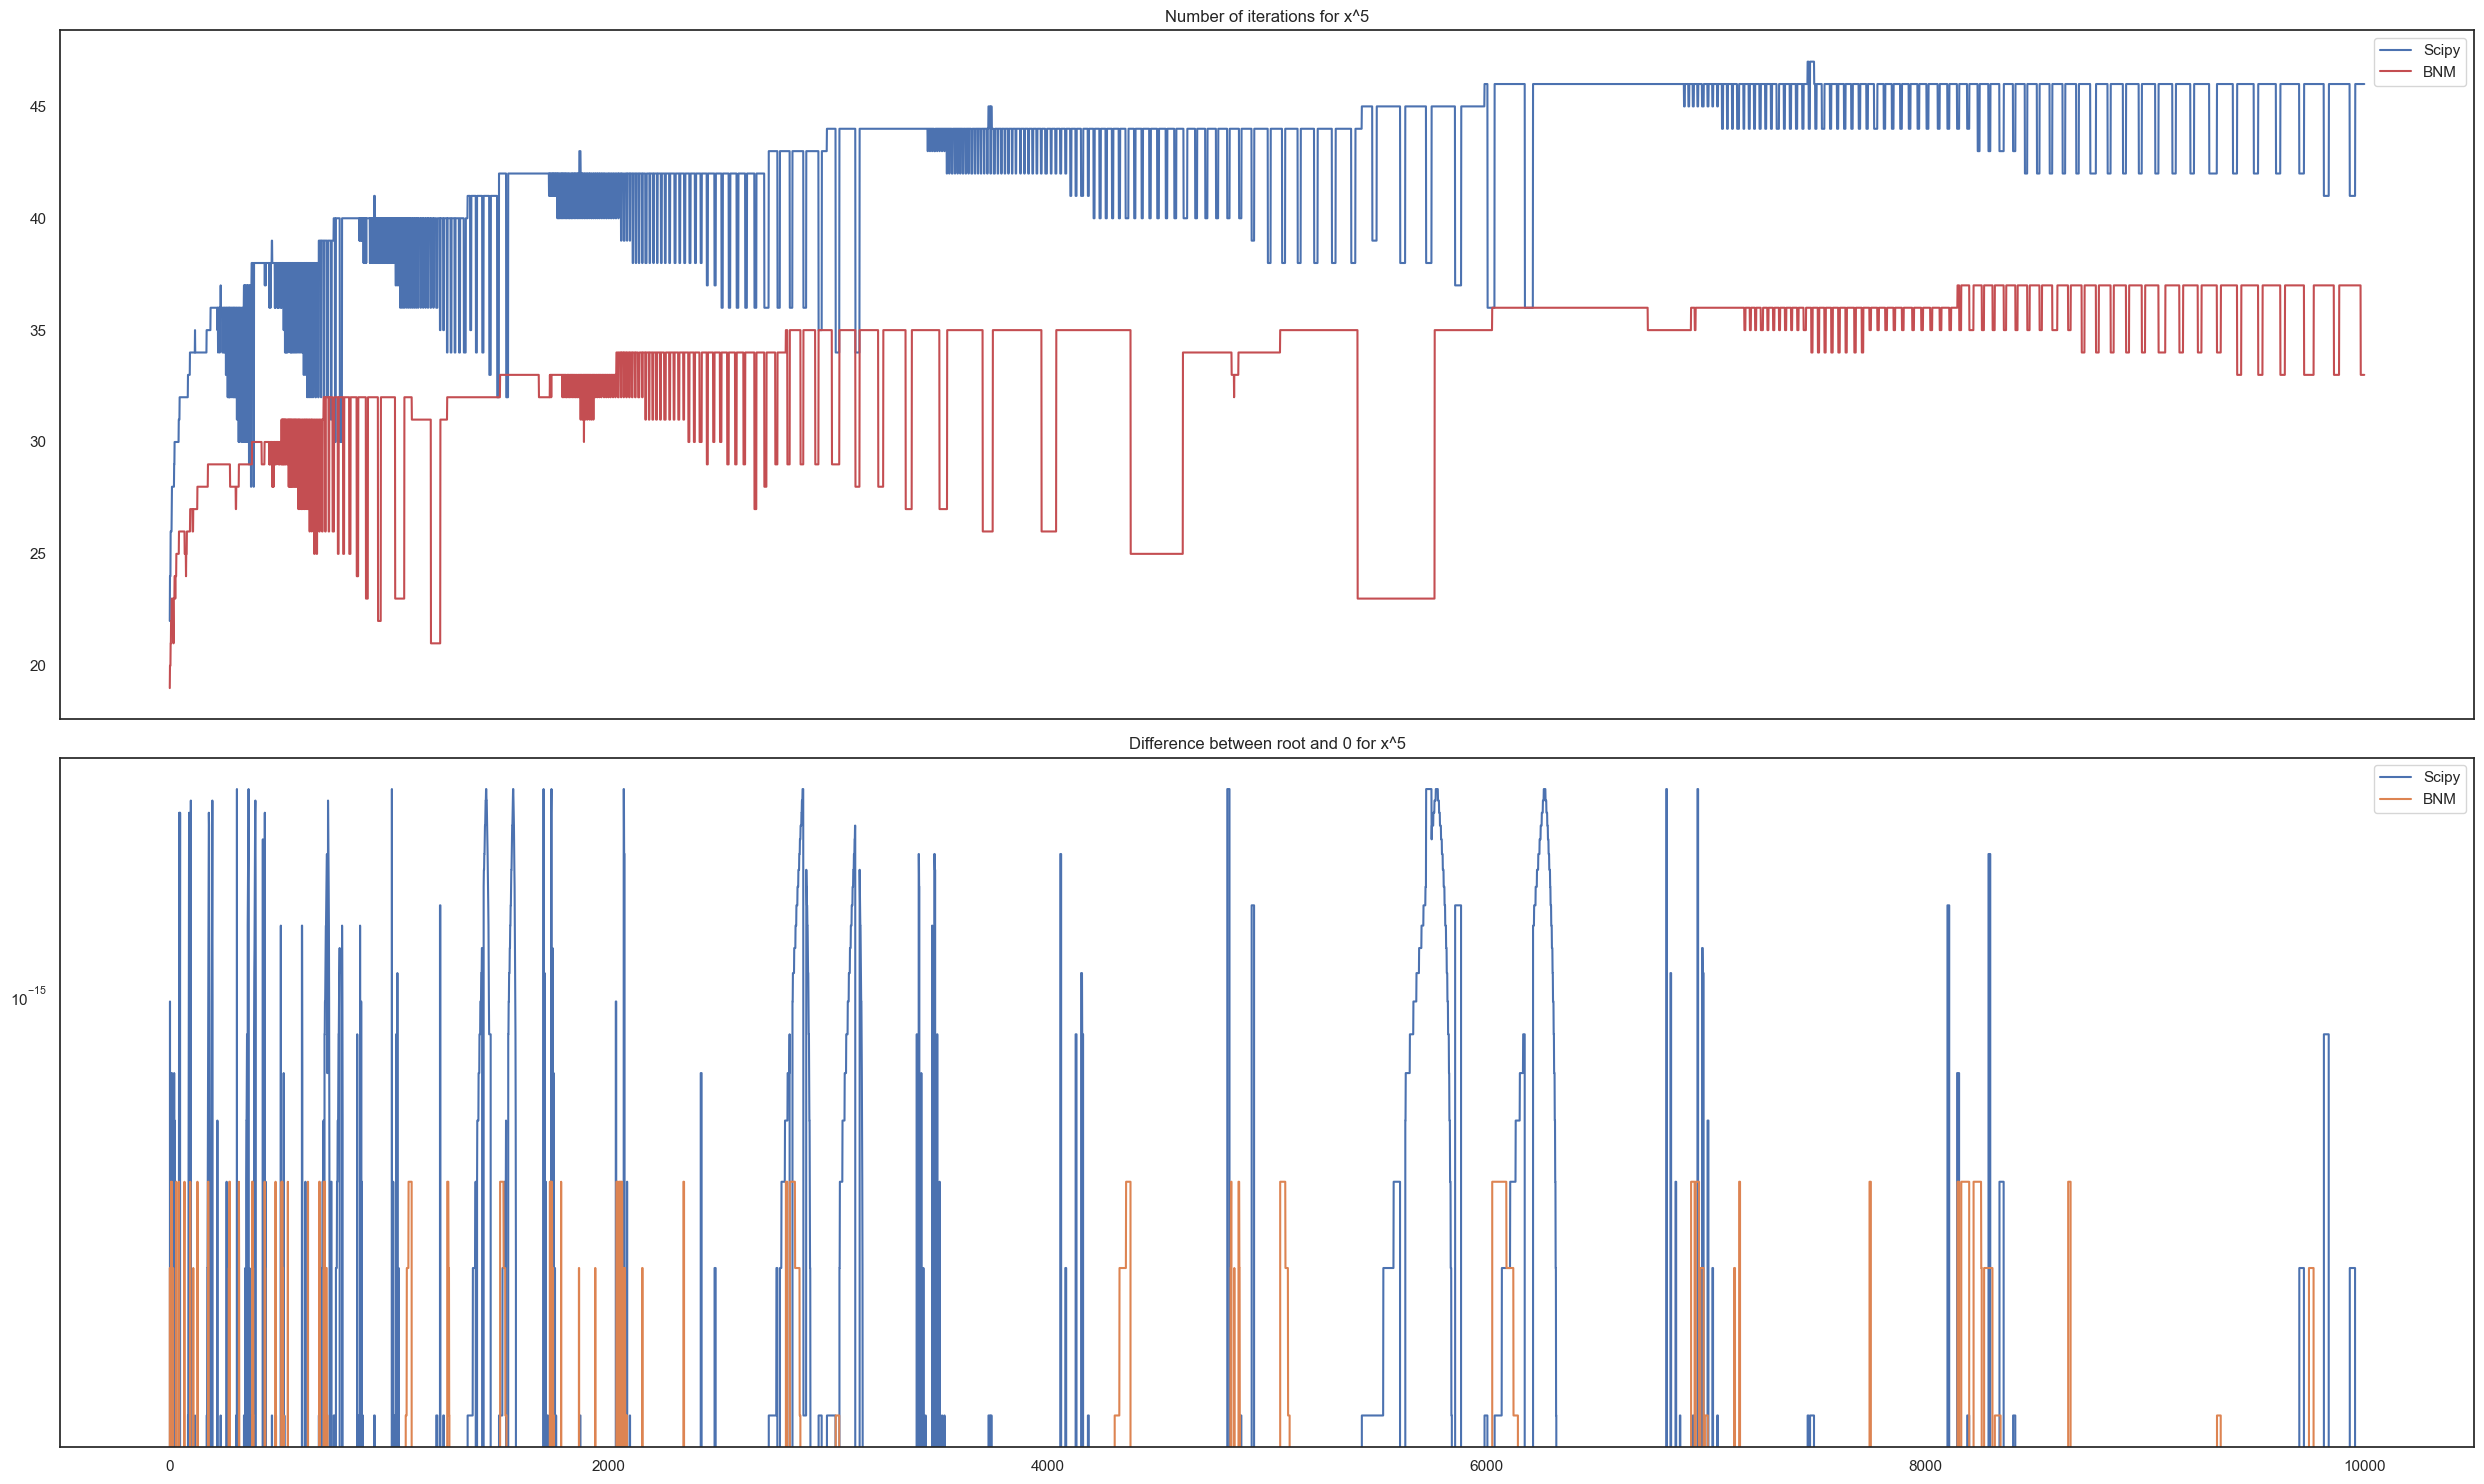

In [90]:
results = json.load(
    open(f"./Results/NonLinear/NonLinearTimings_diffTol_bnm_{number}.json", "r")
)
df = pd.DataFrame(results)

experimentPlot(df, order, noMatlab=True, number=number)
plt.show()

## 2.2 Scipy Brent's method with tolerance 10^-17
Our expected result will be that we will achieve better results (Overall) in comparison with BNumMet's Brentt's method because we will be able to reach the better accuracy while increasing the number of iterations, much to our disappointment, we see that Scipy's Brent's method is still slower than BNumMet's Brent's method, however, it is still more accurate than BNumMet's Brent's method. 

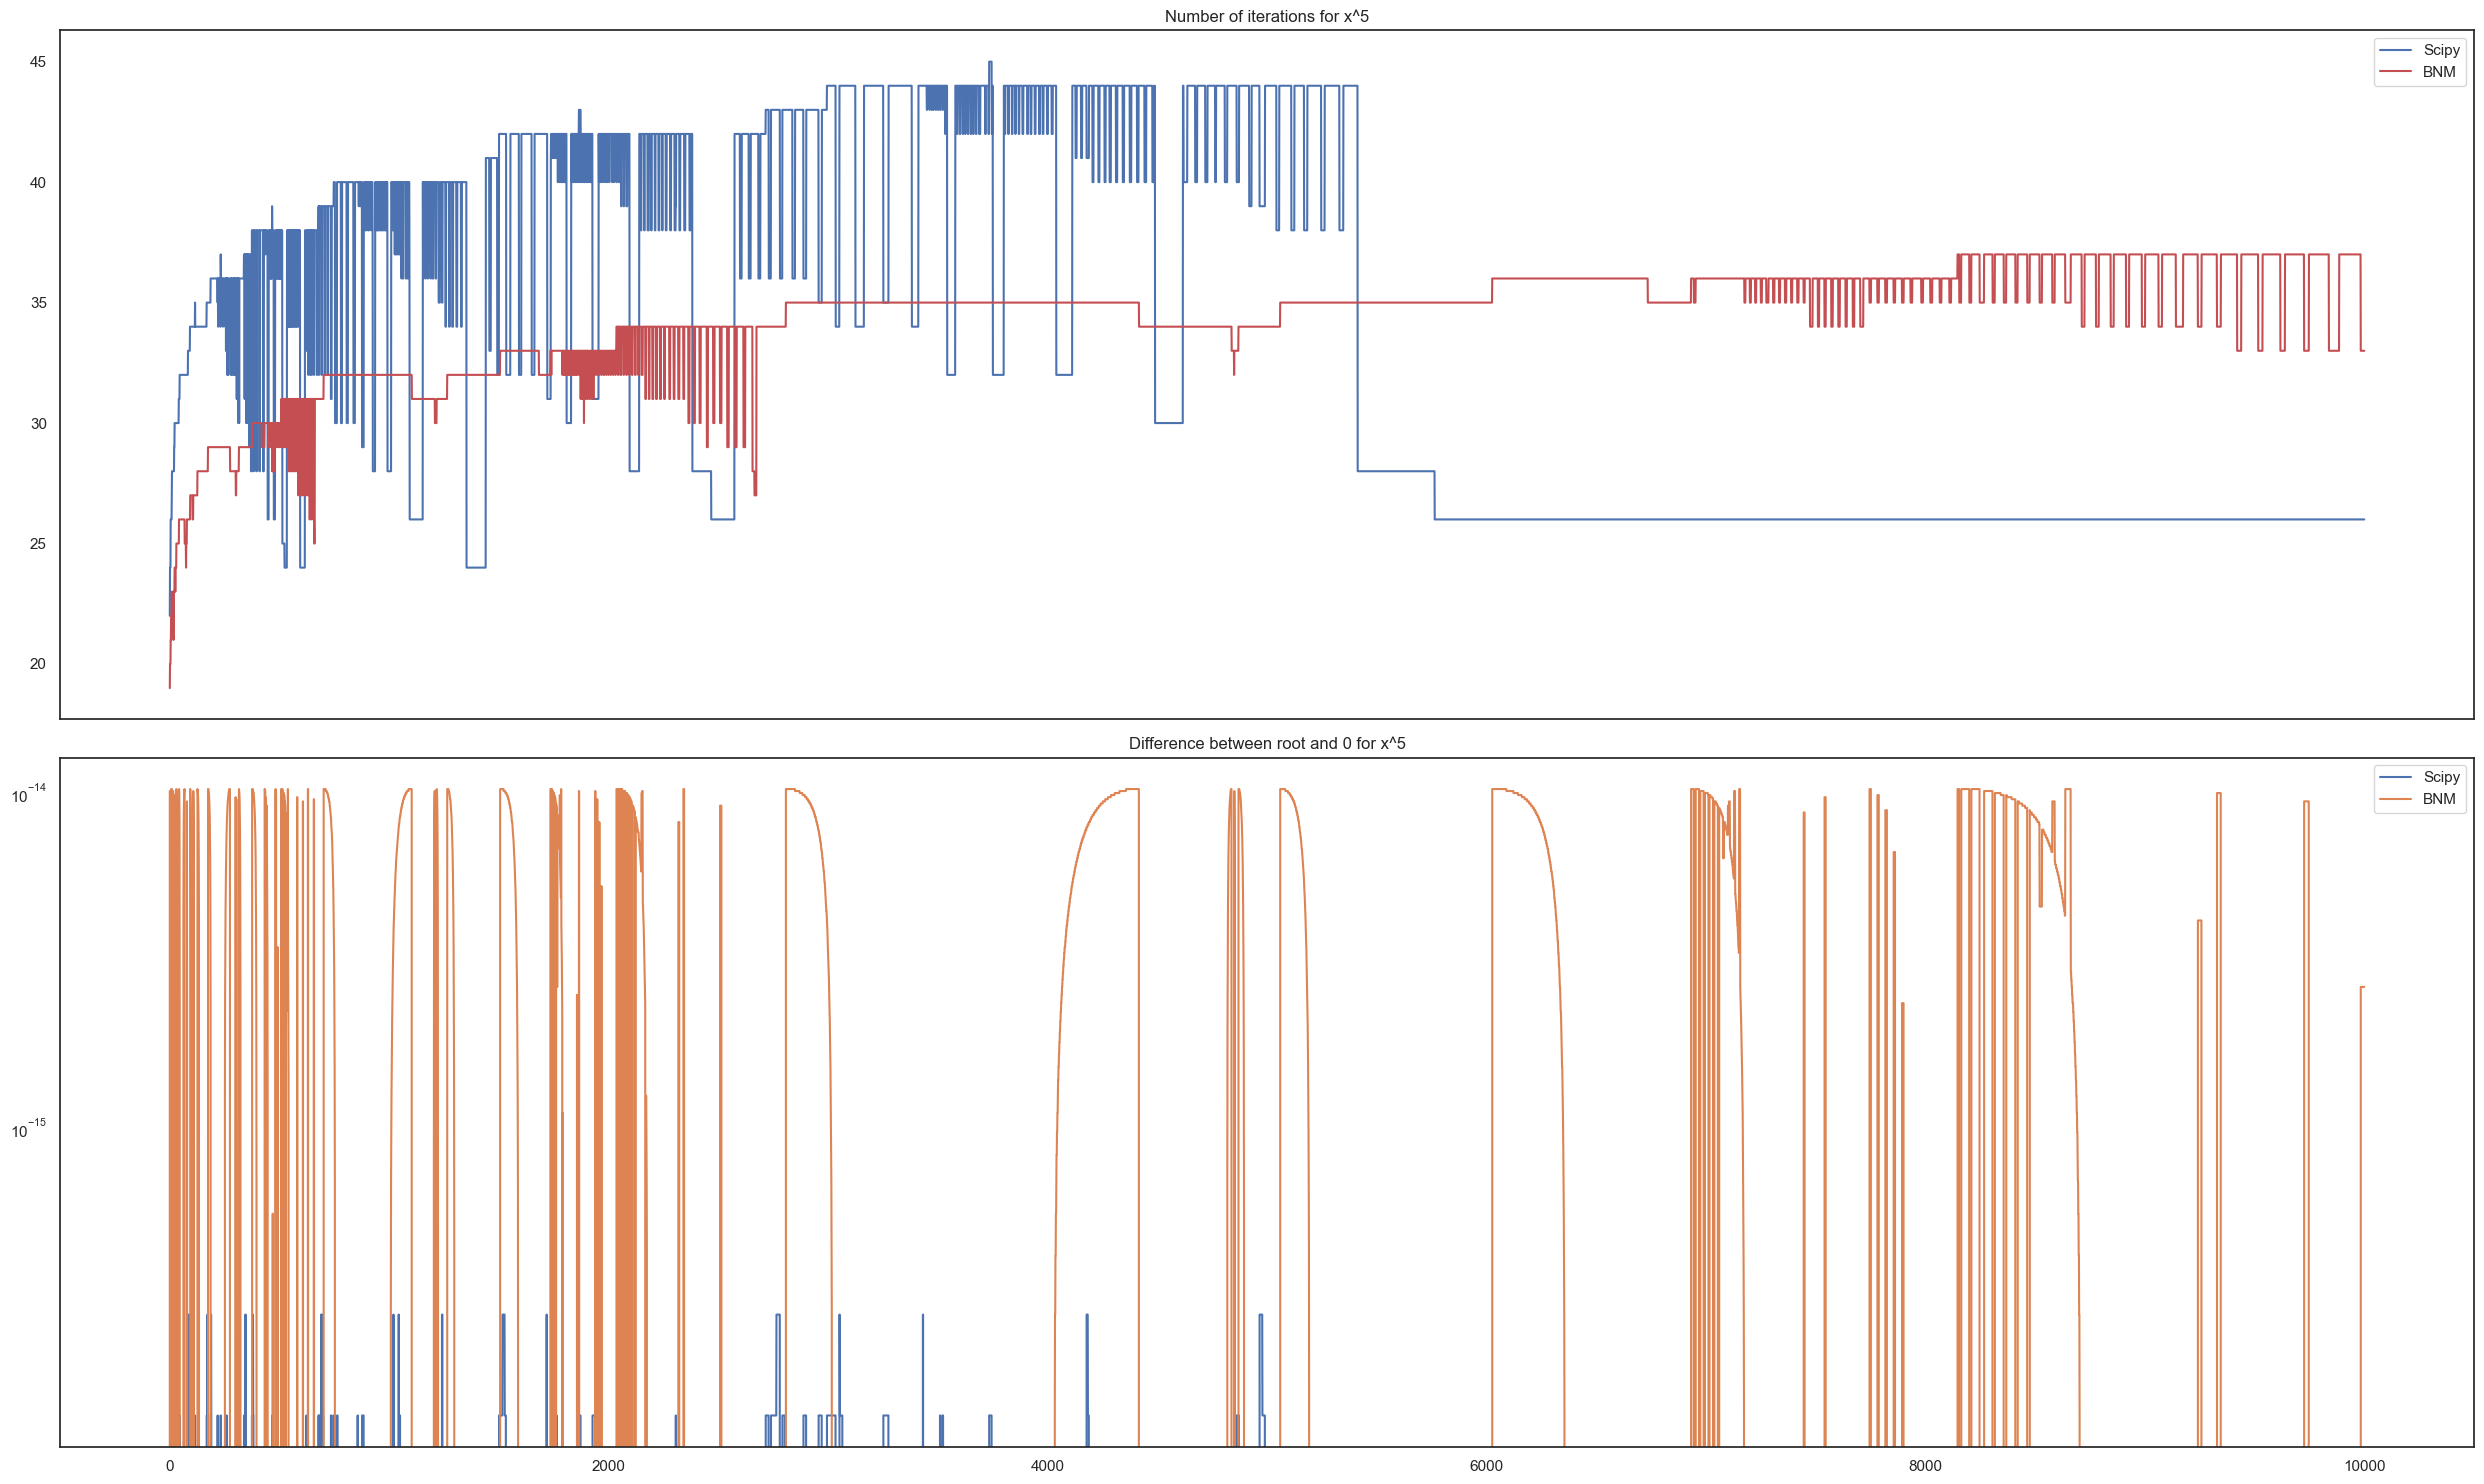

In [91]:
results = json.load(
    open(f"./Results/NonLinear/NonLinearTimings_diffTol_scipy_{number}.json", "r")
)
df = pd.DataFrame(results)

experimentPlot(df, order, noMatlab=True, number=number)
plt.show()